In [1]:
import pytse_client as tse
import statistics as st
import numpy as np
import pandas as pd 
from pandas_datareader import data as pdr 
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
TehranMarket = tse.download(symbols="شتران", write_to_csv=True, adjust=True)

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\pytse_client\download.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_list[symbol].append(


In [3]:
df = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/tickers_data/شتران-ت.csv", index_col = "date",
                 parse_dates = True,
                 na_values=['nan'])
#df = df["adjClose"]
df = pd.DataFrame(df)
print(df)

              open    high     low  adjClose         value    volume  count  \
date                                                                          
2012-10-10     6.0     6.0     6.0       6.0  229575000000   3061000    235   
2012-10-13     6.0     6.0     6.0       6.0      69142500       878     18   
2012-10-14     7.0     7.0     7.0       7.0     419967273      5079     30   
2012-10-15     7.0     7.0     7.0       7.0     280518651      3231     28   
2012-10-16     7.0     7.0     7.0       7.0     527098684      5782     45   
...            ...     ...     ...       ...           ...       ...    ...   
2022-09-10  4770.0  4810.0  4660.0    4751.0  365776549499  76991405   3585   
2022-09-11  4752.0  4800.0  4692.0    4740.0  172702119415  36433678   2640   
2022-09-12  4730.0  4800.0  4710.0    4749.0  145580110947  30655256   2157   
2022-09-13  4800.0  4825.0  4741.0    4796.0  209751202805  43734619   2741   
2022-09-14  4837.0  4837.0  4748.0    4779.0  144684

In [4]:
ticker = tse.Ticker("شتران", adjust=True)
real_time_data = ticker.get_ticker_real_time_info_response()

In [5]:
'''
df.loc['2022-07-13 00:00:00'] = [real_time_data.open_price ,real_time_data.high_price ,real_time_data.low_price, 
                                 real_time_data.adj_close, real_time_data.value ,real_time_data.volume,
                                 real_time_data.count ,real_time_data.yesterday_price, real_time_data.last_price ]
df.to_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/NewData.csv",header = True)
'''

'\ndf.loc[\'2022-07-13 00:00:00\'] = [real_time_data.open_price ,real_time_data.high_price ,real_time_data.low_price, \n                                 real_time_data.adj_close, real_time_data.value ,real_time_data.volume,\n                                 real_time_data.count ,real_time_data.yesterday_price, real_time_data.last_price ]\ndf.to_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/NewData.csv",header = True)\n'

In [6]:
Ndf = df
#pd.read_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/NewData.csv", index_col = "date",
          #         parse_dates = True,
           #        na_values=['nan'])

In [7]:
Ndf = Ndf.loc["2021-01-01":]
print(Ndf.tail())

              open    high     low  adjClose         value    volume  count  \
date                                                                          
2022-09-10  4770.0  4810.0  4660.0    4751.0  365776549499  76991405   3585   
2022-09-11  4752.0  4800.0  4692.0    4740.0  172702119415  36433678   2640   
2022-09-12  4730.0  4800.0  4710.0    4749.0  145580110947  30655256   2157   
2022-09-13  4800.0  4825.0  4741.0    4796.0  209751202805  43734619   2741   
2022-09-14  4837.0  4837.0  4748.0    4779.0  144684336834  30275151   2265   

            yesterday   close  
date                           
2022-09-10     4806.0  4753.0  
2022-09-11     4751.0  4730.0  
2022-09-12     4740.0  4785.0  
2022-09-13     4749.0  4815.0  
2022-09-14     4796.0  4750.0  


In [8]:
print ('Mean is ',np.mean(Ndf['adjClose']) )
print ('Standard Deviation is ',np.std(Ndf['adjClose']))

Mean is  4326.431122448979
Standard Deviation is  683.4986939589851


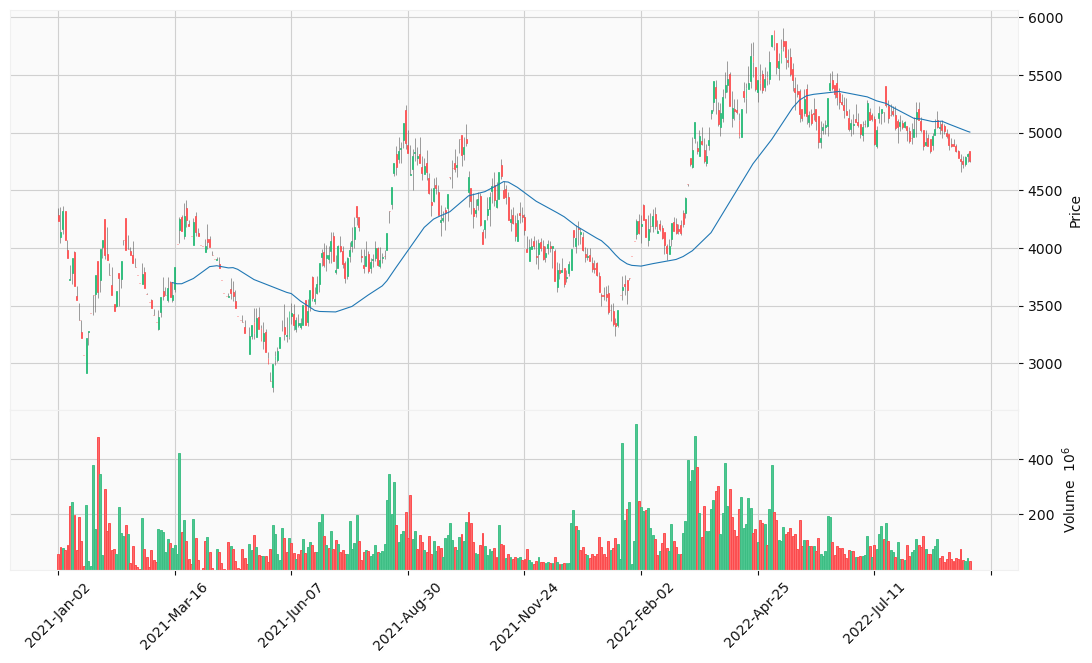

In [9]:
mpf.plot(Ndf,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))

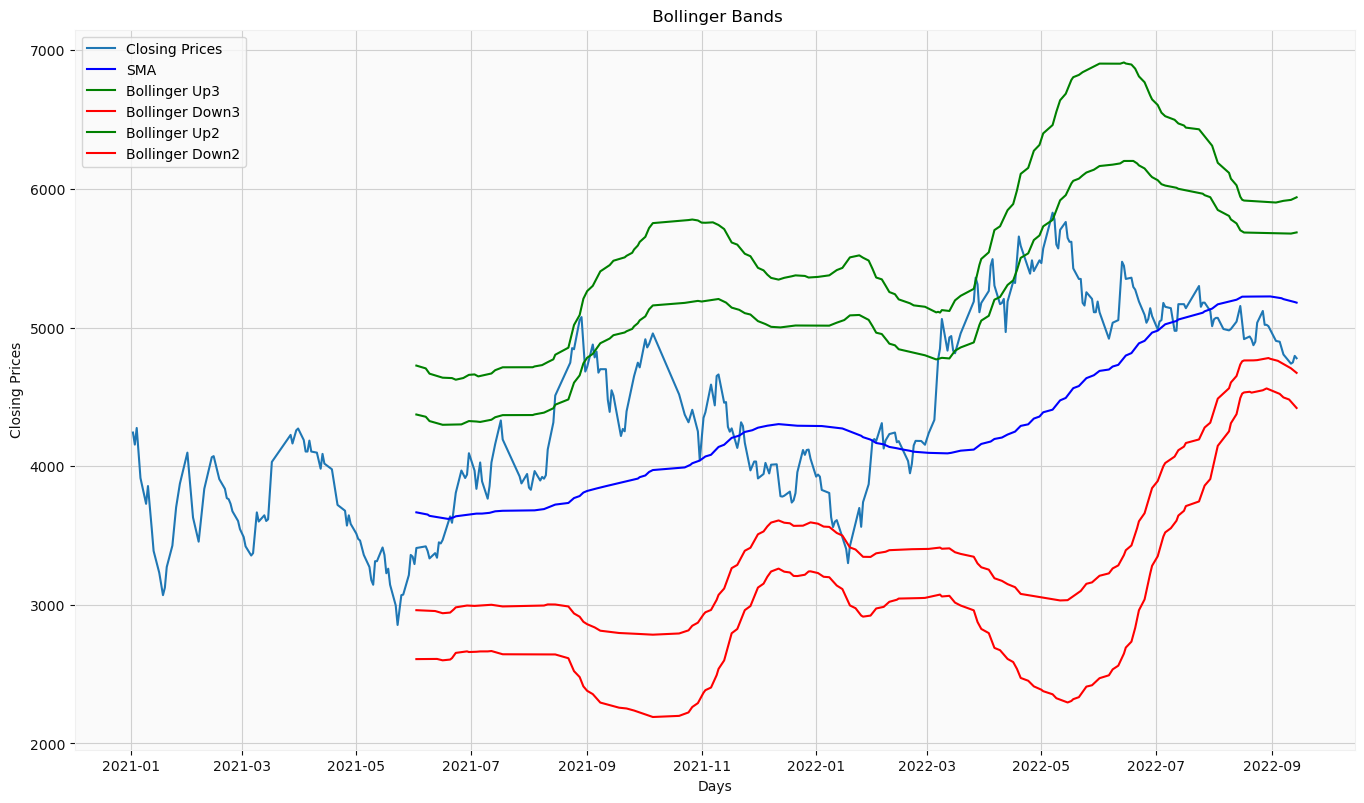

In [10]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()
def get_bollinger_bands3(prices, rate=100):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up3 = sma + std * 3 # Calculate top band
    bollinger_down3 = sma - std * 3 # Calculate bottom band
    return bollinger_up3, bollinger_down3

def get_bollinger_bands2(prices, rate=100):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up2 = sma + std * 2 # Calculate top band
    bollinger_down2 = sma - std * 2 # Calculate bottom band
    return bollinger_up2, bollinger_down2

closing_prices = Ndf['adjClose']
SMA = get_sma(closing_prices , 100)
bollinger_up3, bollinger_down3 = get_bollinger_bands3(closing_prices)
bollinger_up2, bollinger_down2 = get_bollinger_bands2(closing_prices)

plt.axes([1, 2, 2 , 1.5])
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(SMA, label='SMA', c='b')
plt.plot(bollinger_up3, label='Bollinger Up3', c='g')
plt.plot(bollinger_down3, label='Bollinger Down3', c='r')
plt.plot(bollinger_up2, label='Bollinger Up2', c='g')
plt.plot(bollinger_down2, label='Bollinger Down2', c='r')
plt.legend()
plt.show()

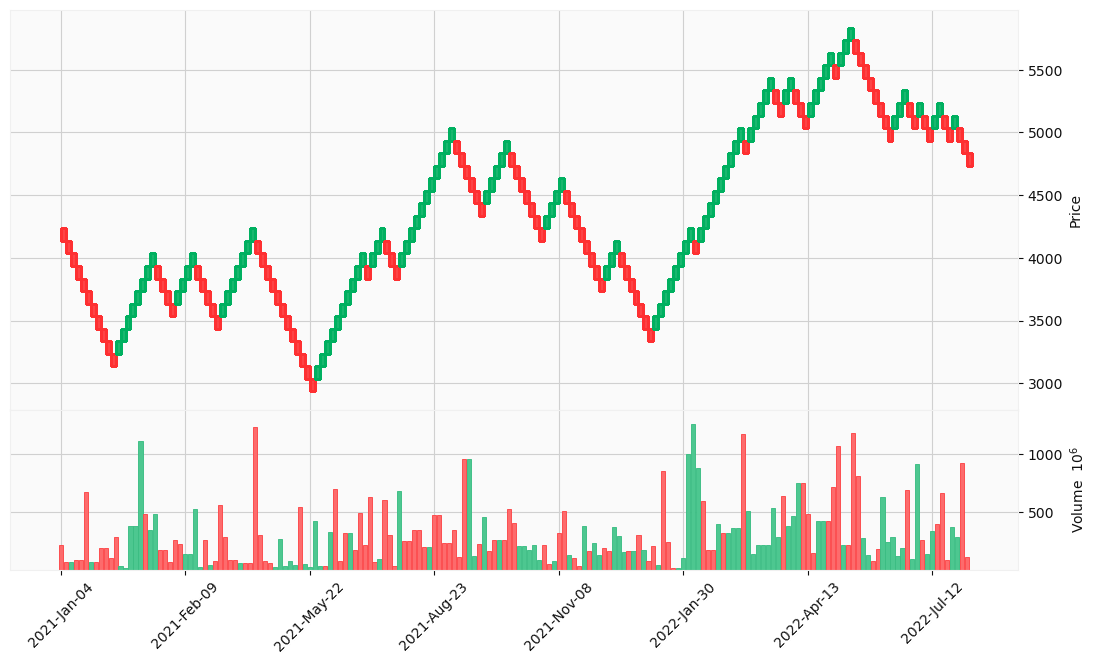

In [11]:
mpf.plot(Ndf,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =100) , 
        figsize=(14,8))

## Log Renko

In [12]:
Ndf['open'] = np.log(Ndf['open'])
Ndf['high'] = np.log(Ndf['high'])
Ndf['low'] = np.log(Ndf['low'])
Ndf['close'] = np.log(Ndf['close'])
print ('Mean is ',np.mean(Ndf['close']) )
print ('Standard Deviation is ',np.std(Ndf['close']))
#print(df)

Mean is  8.357861915039841
Standard Deviation is  0.15910790556605384


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_20048\2650428050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ndf['open'] = np.log(Ndf['open'])
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_20048\2650428050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ndf['high'] = np.log(Ndf['high'])
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_20048\2650428050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

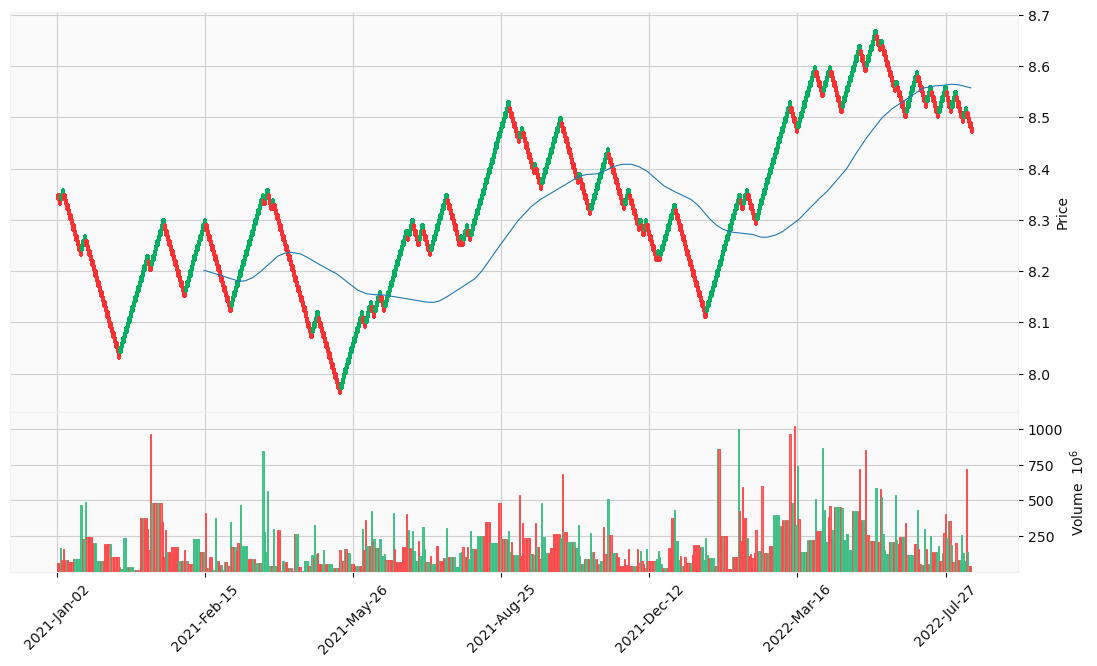

In [13]:
mpf.plot(Ndf,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size = 0.01),mav=100,
         figsize=(14,8))